# Problem 2
In this problem i'm going to:
- retrieve a set of images (faces)
- compute mean image and perform mean substraction
- perform singular value decomposition on them
- plot the error function (as frobenius norm) for low rank approximation of images
- compute r-dimensional feature matrix for images array
- train a logistic regression model and perform classification of faces and compare the results with the test images 

To show code and it's results I used jupyter notebook and python language to implement this project.

In [1]:
# Some initializations
%matplotlib inline
import numpy as np
from PIL import Image
from numpy.ma import array

X = []
XTag = []
XTest = []
XTestTag = []
shape = [1, 2500]
average = np.zeros(shape)
averageTest = np.zeros(shape)


### Part A, B
In the first part I read `train.txt` and `test.txt` files and their inputs to `X` and `XTest` arrays.

In [2]:
with open('faces/train.txt') as trainFile:
    trainText = trainFile.readlines()
    for line in trainText:
        path = line.split(' ')
        arr = np.reshape(array(Image.open(path[0])), shape)
        X.append(arr)
        XTag.append(path[1].replace("\n", ""))
        average += arr
    
with open('faces/test.txt') as testFile:
    testText = testFile.readlines()
    for line in testText:
        path = line.split(' ')
        arr = np.reshape(array(Image.open(path[0])), shape)
        XTest.append(arr)
        XTestTag.append(path[1].replace("\n", ""))
        averageTest += arr


### Part C: computing average face
Here I computed the average faces for `X` and `XTest` datasets and output the result below.
I also defined two helper functions (`showImage` and `showTwoImages`) for showing images inline this jupyter notebook.

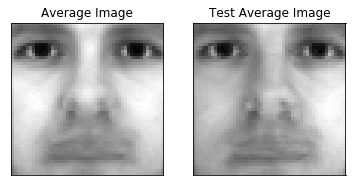

In [3]:
from matplotlib import pyplot as plt

def showImage(data, title):
    data = data.reshape([50, 50])
    fig, [ax1] = plt.subplots(1, 2)
    ax1.set_title(title)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(data, cmap="gray")
    
def showTwoImages(firstData, firstTitle, secondData, secondTitle):
    firstData = firstData.reshape([50, 50])
    secondData = secondData.reshape([50, 50])
    fig, [ax1, ax2] = plt.subplots(1, 2)
    ax1.set_title(firstTitle)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(firstData, cmap="gray")
    ax2.set_title(secondTitle)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(secondData, cmap="gray")
    
average /= len(X)
averageTest /= len(X)
showTwoImages(average, "Average Image", averageTest, "Test Average Image")

### Part D: Mean subtraction 
Here I subtract the mean matrices from the original matrices to normalize them and preview 53'th index of `X` and `XTest` as some sample results for each case.

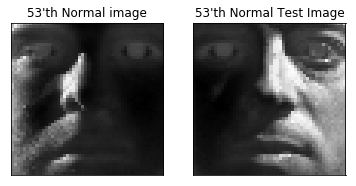

In [4]:
for i in range(len(X)):
    X[i] = X[i] - average
for i in range(len(XTest)):
    XTest[i] = XTest[i] - average
showTwoImages(X[53], "53'th Normal image", XTest[53], "53'th Normal Test Image")


### Part E: computing SVD
I used `linalg` library's `svd` function to perform singular value decomposition for `X` and `XTest` matrices and show images in 53'th index of `V^T` matrices as some results.

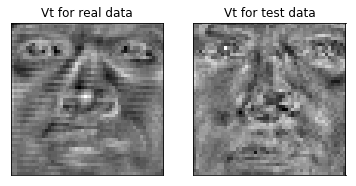

In [5]:
X = np.reshape(X, [len(X), 2500])
XTest = np.reshape(XTest, [len(XTest), 2500])
U, S, Vt = np.linalg.svd(X, full_matrices=False)
UTest, STest, VtTest = np.linalg.svd(XTest, full_matrices=False)
showTwoImages(Vt[53], "Vt for real data", VtTest[53], "Vt for test data")

### Part F: Low Rank Approximation Error
I performed a low rank approximation of `X` matrix for `r` in `[1,200]` and visualized the result. as one shall see, the approximation is better as we increase `r` because we are prserving more amount of data in our approximation and the result will become much more exact.

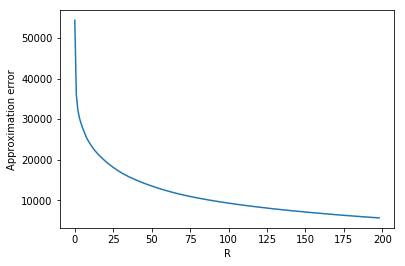

In [6]:
errorData = []
for r in range(1, 200):
    error = 0
    sigma = np.zeros([len(X), len(X)])
    for i in range(r):
        sigma[i][i] = S[i]
    lowRankApprox = np.matmul(np.matmul(U, sigma), Vt)
    errorData.append(np.linalg.norm(lowRankApprox - X, 'fro'))

plt.plot(errorData)
plt.xlabel('R')
plt.ylabel('Approximation error')
plt.show()

### Part G: computing feature matrix
Here I provide a function to compute feature matrix based on the input matrix and its `V^T` associated matrix in singular value decomposition.

In [7]:
from sklearn import linear_model
def computeF(dataset, datasetVt, r):
    f = np.zeros([len(dataset), r])
    reshaped_set = np.reshape(dataset, [len(dataset), 2500])
    reshaped_v = np.reshape(datasetVt[0:r].T, [2500, r])
    np.matmul(reshaped_set, reshaped_v, f)
    return f

### Part G and H: performing face recognition
In the final part I computed the feature matrices for `X` and `XTest` matrices and then used `LogisticRegression()` class from `linear_model` package to predict class (or tag) of each image and perform a recognition of the faces to know which face belongs to which human. 

I also collected the errors (wrong predicts) in `errorData` array and visualized them; as we can see, the number of errors reduces as we increase the size of feature matrix and again that's because more data is preserved in our feataure model.


3


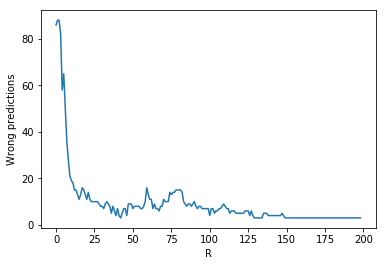

In [8]:
e = 0
errorData = []

for r in range(1, 200):
    
    F = computeF(X, Vt, r)
    FTest = computeF(XTest, Vt, r)

    e = 0
    regression = linear_model.LogisticRegression()
    regression.fit(F, XTag)
    predict = regression.predict(FTest)
    for j in range(len(XTestTag)):
        if XTestTag[j] != predict[j]:
            e += 1
    errorData.append(e)

print(e)
plt.plot(errorData)
plt.xlabel("R")
plt.ylabel("Wrong predictions")
plt.show()